<a href="https://colab.research.google.com/github/valeriafigueredo-data/introducao_analise_dados_cesar_school/blob/main/projeto_final_iad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Projeto Final - Introdução à Análise de Dados

Professor: Eronides da Silva Neto (efsn@cesar.school)

Alunos:

Aluno(a) 01: (Tathiana de Souza Martins) -- tsm2@cesar.school

Aluno(a) 02: (Valéria Cristina A. R. de Figueredo) -- vcarf@cesar.school

Aluno(a) 03: (Ilton Albuquerque Martins de Lima) -- iaml@cesar.school

### Objetivo:

O objetivo do projeto final é realizar operação de leitura de um conjunto de dados tabulares (DataFrame) e realizar operações: limpeza e análise de dados.

### Descrição dos dados

**Sistema de Informação sobre Mortalidade – SIM**

O Sistema de Informação sobre Mortalidade (SIM), desenvolvido pelo Ministério da Saúde em 1975, é produto da unificação de mais de quarenta modelos de Declaração de Óbito utilizados ao longo dos anos. Sua finalidade é coletar e fornecer dados sobre a mortalidade no país.

Com sua longa série temporal, o SIM é um patrimônio nacional, visto que possui informações fundamentais para que possamos conhecer os aspectos referentes à mortalidade no Brasil e às causas de adoecimento que levaram ao óbito. É, ainda, um dos principais instrumentos para apoiar a elaboração de políticas públicas de saúde e seguridade social mais efetivas visando à prevenção, à promoção e o cuidado em saúde.

Os registros são oriundos do sistema SIM, contendo dados socioeconômicos, local de residência e ocorrência, óbitos fetais e não fetais, condições e causas do óbito, e informações de causas externas.


 Licença: Creative Commons Attribution

 Formatos: CSV; PDF;

 Atualização:

 Última alteração: 23/02/2024 09:01:59

[Fonte dos dados:](https://dados.gov.br/dados/conjuntos-dados/sim-1979-2019) Site do Ministério da Saúde

[Dicionário dos dados:](https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf) Arquivo com a descrição do arquivo CSV (Dataframe) utilizado neste projeto como nome, quantidade de colunas e o seu significado.


###1. Bibliotecas

In [ ]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###2. Dataframe

In [ ]:
df_v1 = pd.read_csv('/content/drive/Shareddrives/projeto_final_iad/Mortalidade_Geral_2023.csv', encoding='utf-8', sep=';', quotechar='"', dtype=str, low_memory=False)

In [ ]:
cod_ibge_municipios_df = pd.read_excel('/content/drive/Shareddrives/projeto_final_iad/cod_municipios_IBGE_excel.xlsx')

In [ ]:
df_v1.head(3)

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,14022023,0754,827,270300,20061951,471,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I850,N,NaN,NaN
1,2,1,2,14022023,0752,190,NaN,16021956,466,1,...,NaN,NaN,NaN,NaN,NaN,NaN,C349,N,NaN,NaN
2,3,1,2,14022023,0101,835,352710,07071959,463,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I420,N,NaN,NaN


In [ ]:
cod_ibge_municipios_df.head(3)

,CÓDIGO IBGE\nMUNICÍPIOS,UF,MUNICÍPIO
0,120001,ACRE,ACRELÂNDIA
1,120005,ACRE,ASSIS BRASIL
2,120010,ACRE,BRASILÉIA


###3. Método info()

O método **info()** fornece informações sobre o DataFrame, incluindo o número total de entradas, o número de colunas e os tipos de dados de cada coluna.

Vamos aplicá-lo ao DataFrame:

In [ ]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400590 entries, 0 to 1400589
Data columns (total 86 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   contador    1400590 non-null  object
 1   ORIGEM      1400590 non-null  object
 2   TIPOBITO    1400590 non-null  object
 3   DTOBITO     1400590 non-null  object
 4   HORAOBITO   1354699 non-null  object
 5   NATURAL     1337482 non-null  object
 6   CODMUNNATU  1320098 non-null  object
 7   DTNASC      1372894 non-null  object
 8   IDADE       1375342 non-null  object
 9   SEXO        1400590 non-null  object
 10  RACACOR     1353574 non-null  object
 11  ESTCIV      1313110 non-null  object
 12  ESC         1291441 non-null  object
 13  ESC2010     1283376 non-null  object
 14  SERIESCFAL  383049 non-null   object
 15  OCUP        1184251 non-null  object
 16  CODMUNRES   1400590 non-null  object
 17  LOCOCOR     1400590 non-null  object
 18  CODESTAB    1027290 non-null  object
 19  

O arquivo possui 85 colunas, cujas definições constam no [Dicionário dos dados](https://https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf). Todas as colunas não serão descritas, apenas as colunas utilizadas na análise dos dados, após a limpeza, em razão de sua quantidade significativa. Porém, todas as colunas foram devidamente lidas e excluídas com base na quantidade de dados nulos ou informações pouco relevantes para responder nossos questionamentos analíticos.

###4. Método describe()

O método **describe()** fornece estatísticas descritivas resumidas para colunas numéricas do DataFrame, como contagem, média, desvio padrão, quartis, mínimo e máximo. Vamos aplicá-lo ao DataFrame:

In [ ]:
df_v1.describe()

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
count,1400590,1400590,1400590,1400590,1354699,1337482,1320098,1372894,1375342,1400590,...,1939,47509,39146,39146,35858,38095,1399295,880731,7515,6519
unique,1400590,1,2,365,1446,161,5551,39099,250,3,...,3,3,334,4,374,2,5862,2,15,807
top,1,1,2,18112023,0600,835,355030,20011940,483,1,...,1,M,10082023,3,10082023,2,I219,N,08,I469
freq,1,1400590,1375342,4625,11698,234389,50348,209,32419,765529,...,1338,44990,335,21559,302,29969,82915,705023,1722,1466


###5. Modificando e criando colunas

O dataframe possui colunas que possuem códigos de municípios ('CODMUNOCOR', 'CODMUNNATU', 'CODMUNRES'), achamos que ficaria mais legível e fácil de analisar e visualizar os dados se trocássemos os códigos dos municípios pelo nome deles e criássemos novas colunas com os estados correspondentes aos municípios.

Isso facilitará bastante a análise por estados, se assim o desejarmos fazê-lo.

In [ ]:
# Renomeando as colunas de cod_ibge_municipios_df
cod_ibge_municipios_df.rename(columns={'CÓDIGO IBGE\nMUNICÍPIOS': 'CODMUNI', 'MUNICÍPIO' : 'MUNICIPIO'}, inplace=True)

In [ ]:
# Transformando a coluna CODMUNI no índice
cod_ibge_municipios_df.set_index('CODMUNI', inplace=True)

In [ ]:
cod_ibge_municipios_df.head(3)

,UF,MUNICIPIO
CODMUNI,,
120001,ACRE,ACRELÂNDIA
120005,ACRE,ASSIS BRASIL
120010,ACRE,BRASILÉIA


In [ ]:
# df_v2 vai ser o DF com as colunas municípios e UF
df_v2 = df_v1.copy(deep=True)

In [ ]:
# Convertendo o DataFrame para um dicionário usando o índice como chave
municipio_dict = cod_ibge_municipios_df.to_dict('index')

In [ ]:
# Função que retornam o nome do município de acordo com o código do munícipio
def codigo_para_nome_municipio(entrada):
    if entrada in municipio_dict:
        return municipio_dict[entrada]['MUNICIPIO']
    else:
        return None

# Função que retornam o UF/estado de acordo com o código do munícipio
def codigo_para_nome_uf(entrada):
    if entrada in municipio_dict:
        return municipio_dict[entrada]['UF']
    else:
        return None

Como as colunas CODMUNOCOR, CODMUNNATU e CODMUNRES são dtype object, o que significa que elas são strings, transformaremos em inteiros para poder realizar a comparação dos códigos. Antes disso precisamos eliminar os valores nulos.

In [ ]:
# Removendo linhas com valores NaN nas colunas CODMUNOCOR e CODMUNNATU
df_v2 = df_v2.dropna(subset=['CODMUNOCOR', 'CODMUNNATU', 'CODMUNRES']).copy() # Aplicando o copy() para que não afete o DataFrame df_v2 de maneira inesperada, especialmente porque haverá outras operações planejadas posteriormente.


# Convertendo as colunas para inteiros
df_v2['CODMUNOCOR'] = df_v2['CODMUNOCOR'].astype(int)
df_v2['CODMUNNATU'] = df_v2['CODMUNNATU'].astype(int)
df_v2['CODMUNRES'] = df_v2['CODMUNRES'].astype(int)


In [ ]:
# Aplicando as funções nas colunas do DataFrame 'df_v4' enquento criamos novas colunas
df_v2['MUNICIPIO_DO_FALECIDO'] = df_v2['CODMUNNATU'].apply(codigo_para_nome_municipio)
df_v2['MUNICIPIO_DO_OBITO'] = df_v2['CODMUNOCOR'].apply(codigo_para_nome_municipio)
df_v2['MUNICIPIO_DE_RESIDENCIA'] = df_v2['CODMUNRES'].apply(codigo_para_nome_municipio)

df_v2['UF_MUNICIPIO_DO_FALECIDO'] = df_v2['CODMUNNATU'].apply(codigo_para_nome_uf)
df_v2['UF_MUNICIPIO_DO_OBITO'] = df_v2['CODMUNOCOR'].apply(codigo_para_nome_uf)
df_v2['UF_MUNICIPIO_DE_RESIDENCIA'] = df_v2['CODMUNRES'].apply(codigo_para_nome_uf)

# Removendo colunas intermediárias
df_v2.drop(columns=['CODMUNNATU', 'CODMUNOCOR', 'CODMUNRES'], inplace=True)


In [ ]:
df_v2[['MUNICIPIO_DO_FALECIDO', 'MUNICIPIO_DO_OBITO', 'MUNICIPIO_DE_RESIDENCIA', 'UF_MUNICIPIO_DO_FALECIDO', 'UF_MUNICIPIO_DO_OBITO', 'UF_MUNICIPIO_DE_RESIDENCIA']]

,MUNICIPIO_DO_FALECIDO,MUNICIPIO_DO_OBITO,MUNICIPIO_DE_RESIDENCIA,UF_MUNICIPIO_DO_FALECIDO,UF_MUNICIPIO_DO_OBITO,UF_MUNICIPIO_DE_RESIDENCIA
0,IBATEGUARA,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DO RIO PRETO,ALAGOAS,SÃO PAULO,SÃO PAULO
2,LINS,LINS,LINS,SÃO PAULO,SÃO PAULO,SÃO PAULO
3,JACAREZINHO,BAURU,PEDERNEIRAS,PARANÁ,SÃO PAULO,SÃO PAULO
5,PARIPIRANGA,RIBEIRA DO POMBAL,ADUSTINA,BAHIA,BAHIA,BAHIA
6,ADUSTINA,RIBEIRA DO POMBAL,ADUSTINA,BAHIA,BAHIA,BAHIA
...,...,...,...,...,...,...
1400585,JACAREACANGA,JACAREACANGA,JACAREACANGA,PARÁ,PARÁ,PARÁ
1400586,MACAPÁ,ÓBIDOS,ÓBIDOS,AMAPÁ,PARÁ,PARÁ
1400587,OIAPOQUE,OIAPOQUE,OIAPOQUE,AMAPÁ,AMAPÁ,AMAPÁ
1400588,ALTAMIRA,ALTAMIRA,ALTAMIRA,PARÁ,PARÁ,PARÁ


###6. Tratando os valores nulos:

Para compreendermos o impacto dos nulos no nosso dataframe precisamos primeiro descobrir quantas linhas há no dataframe.

In [ ]:
# Obter o número de linhas do DataFrame
num_linhas = df_v2.shape[0] # shape() retorna o tamanho/formato do DF. [0] linhas e [1] colunas

# Exibir o número de linhas
print("Número de linhas do DataFrame:", num_linhas)


Número de linhas do DataFrame: 1320098


In [ ]:
# Contar o número total de valores nulos em todo o DataFrame
total_nulos = df_v2.isnull().sum().sum()

# Exibir o número total de valores nulos no DataFrame
print("\nNúmero total de valores nulos no DataFrame:", total_nulos)


Número total de valores nulos no DataFrame: 57072301


In [ ]:
# Contar o número de valores nulos em cada coluna
print("Número de valores nulos em cada coluna:")
colunas_nulos = df_v2.isnull().sum()
colunas_nulos

Número de valores nulos em cada coluna:


contador                          0
ORIGEM                            0
TIPOBITO                          0
DTOBITO                           0
HORAOBITO                     42506
                              ...  
MUNICIPIO_DO_OBITO              151
MUNICIPIO_DE_RESIDENCIA        1691
UF_MUNICIPIO_DO_FALECIDO      28440
UF_MUNICIPIO_DO_OBITO           151
UF_MUNICIPIO_DE_RESIDENCIA     1691
Length: 89, dtype: int64

Colunas com mais dados nulos:

In [ ]:
colunas_nulos.sort_values(ascending=False)

CB_PRE        1320098
CAUSAMAT      1320069
TPRESGINFO    1318365
CIRURGIA      1318153
EXAME         1318034
               ...   
DIFDATA             0
ATESTADO            0
DTRECORIGA          0
OPOR_DO             0
contador            0
Length: 89, dtype: int64

Algumas colunas chegam a ter 100% de nulos e outras tem índices altíssimos de nulos. Portanto decidimos excluir colunas que possuam aproximadamente 50% ou mais de nulos.

Colunas com aproximadamente 50% ou mais nulos:

In [ ]:
colunas_com_muitos_nulos = []

for coluna, nulos in colunas_nulos.items():
  if nulos >= 700000:
      colunas_com_muitos_nulos.append(coluna)

colunas_com_muitos_nulos

['SERIESCFAL',
 'IDADEMAE',
 'ESCMAE',
 'ESCMAE2010',
 'SERIESCMAE',
 'OCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'GRAVIDEZ',
 'SEMAGESTAC',
 'GESTACAO',
 'PARTO',
 'OBITOPARTO',
 'PESO',
 'TPMORTEOCO',
 'OBITOGRAV',
 'OBITOPUERP',
 'EXAME',
 'CIRURGIA',
 'LINHAC',
 'LINHAD',
 'LINHAII',
 'CB_PRE',
 'COMUNSVOIM',
 'CIRCOBITO',
 'ACIDTRAB',
 'FONTE',
 'DTINVESTIG',
 'FONTEINV',
 'CAUSAMAT',
 'ESCMAEAGR1',
 'NUDIASOBCO',
 'DTCADINV',
 'TPOBITOCOR',
 'DTCONINV',
 'FONTES',
 'TPRESGINFO',
 'TPNIVELINV',
 'DTCADINF',
 'MORTEPARTO',
 'DTCONCASO',
 'ALTCAUSA',
 'TP_ALTERA',
 'CB_ALT']

Iremos eliminar todas as colunas que possuem mais de 50% de nulos e outras colunas que consideramos pouco relevante para o desenvolvimento de nossa análise e a resposta de nossos quesitos.

Isso não significa que tais colunas não sejam importantes do ponto de vista macro ou com dados irrelevantes para futuras pesquisas. O que ocorre é que nesse momento é necessário simplificar os dados de acordo com os nossos objetivos de pesquisa a fim de garantir maior objetividade, efetividade e celeridade na nossa análise.

Essas colunas serão incluídas na lista colunas_a_remover

In [ ]:
# Acrescentando mais colunas a serem excluídas
colunas_a_remover = ['ORIGEM','VERSAOSIST','VERSAOSCB', 'contador', 'CAUSABAS_O', 'CODESTAB', 'CODIFICADO', 'STCODIFICA', 'NUMEROLOTE', 'DTRECORIGA', 'OPOR_DO']

In [ ]:
#Excluindo colunas acrescentando mais colunas a serem excluídas

df_v3 = df_v2.drop(columns=colunas_a_remover).copy(deep=True)
df_v3.drop(columns=colunas_com_muitos_nulos, inplace=True)

In [ ]:
df_v3.shape

(1320098, 34)

In [ ]:
# Quantos valores nulos ainda restam
df_v3.isnull().sum()

TIPOBITO                           0
DTOBITO                            0
HORAOBITO                      42506
NATURAL                            0
DTNASC                         23284
IDADE                          22154
SEXO                               0
RACACOR                        41296
ESTCIV                         79405
ESC                            99521
ESC2010                       104642
OCUP                          197096
LOCOCOR                            0
ASSISTMED                     399226
NECROPSIA                     374477
LINHAA                         37858
LINHAB                        321791
CAUSABAS                           0
DTATESTADO                      5201
DTCADASTRO                       506
ATESTANTE                      90688
DTRECEBIM                        100
ATESTADO                           0
ESCFALAGR1                    104642
STDOEPIDEM                         2
STDONOVA                           0
DIFDATA                            0
T

Antes de eliminarmos o restante dos nulos, iremos dividir o dataframe em dois. E tratar os dados nulos de forma individualizada para cada dataframe.

###7. Dividindo o Dataframe

Precisamos dividir os dataframes em dois. Um dataframe com mortes relacionadas ao feto (df_maes). E outro com morte não fetal (df_morte_geral).

In [ ]:
# Dataframes com divisão entre mortes relacionadas ao parto
df_morte_geral = df_v3[df_v3['TIPOBITO'] == '2'].copy(deep=True)

In [ ]:
# Df de mortes relacionadas a gravidez/parto e bebês/feto
df_maes = df_v3[df_v3['TIPOBITO'] == '1'].copy(deep=True)

In [ ]:
# Df de mortes relacionadas a gravidez/parto e bebês/feto
df_maes

,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,TPPOS,MUNICIPIO_DO_FALECIDO,MUNICIPIO_DO_OBITO,MUNICIPIO_DE_RESIDENCIA,UF_MUNICIPIO_DO_FALECIDO,UF_MUNICIPIO_DO_OBITO,UF_MUNICIPIO_DE_RESIDENCIA
14,1,14022023,1044,841,NaN,NaN,1,NaN,NaN,NaN,...,0,1,010,N,CARLÓPOLIS,SANTO ANTÔNIO DA PLATINA,CARLÓPOLIS,PARANÁ,PARANÁ,PARANÁ
91,1,01012023,0750,822,NaN,NaN,2,NaN,NaN,NaN,...,0,1,002,N,AROEIRAS DO ITAIM,PICOS,AROEIRAS DO ITAIM,PIAUÍ,PIAUÍ,PIAUÍ
92,1,01012023,1750,822,NaN,NaN,2,NaN,NaN,NaN,...,0,1,107,S,PICOS,PICOS,PICOS,PIAUÍ,PIAUÍ,PIAUÍ
146,1,01012023,NaN,813,NaN,NaN,2,NaN,NaN,NaN,...,0,1,302,S,NOVA OLINDA DO NORTE,NOVA OLINDA DO NORTE,NOVA OLINDA DO NORTE,AMAZONAS,AMAZONAS,AMAZONAS
209,1,01012023,0245,833,NaN,NaN,1,NaN,NaN,NaN,...,0,1,087,S,RIO DE JANEIRO,RIO DE JANEIRO,NOVA IGUAÇU,RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400546,1,08052023,2300,813,NaN,NaN,1,NaN,NaN,NaN,...,0,1,036,NaN,ATALAIA DO NORTE,ATALAIA DO NORTE,ATALAIA DO NORTE,AMAZONAS,AMAZONAS,AMAZONAS
1400554,1,12062023,2100,813,NaN,NaN,1,NaN,NaN,NaN,...,0,1,108,NaN,EIRUNEPÉ,EIRUNEPÉ,EIRUNEPÉ,AMAZONAS,AMAZONAS,AMAZONAS
1400555,1,14062023,1320,815,NaN,NaN,2,NaN,NaN,NaN,...,0,1,065,NaN,JACAREACANGA,JACAREACANGA,JACAREACANGA,PARÁ,PARÁ,PARÁ
1400565,1,27072023,1400,816,NaN,NaN,1,NaN,NaN,NaN,...,0,1,095,NaN,OIAPOQUE,OIAPOQUE,OIAPOQUE,AMAPÁ,AMAPÁ,AMAPÁ


In [ ]:
# Dataframe com mortes não relacionadas ao parto
df_morte_geral.head(3)

,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,TPPOS,MUNICIPIO_DO_FALECIDO,MUNICIPIO_DO_OBITO,MUNICIPIO_DE_RESIDENCIA,UF_MUNICIPIO_DO_FALECIDO,UF_MUNICIPIO_DO_OBITO,UF_MUNICIPIO_DE_RESIDENCIA
0,2,14022023,0754,827,20061951,471,1,1,2,1,...,0,1,022,N,IBATEGUARA,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DO RIO PRETO,ALAGOAS,SÃO PAULO,SÃO PAULO
2,2,14022023,0101,835,07071959,463,1,4,1,3,...,0,1,022,N,LINS,LINS,LINS,SÃO PAULO,SÃO PAULO,SÃO PAULO
3,2,14022023,0120,841,02061965,457,2,1,4,4,...,0,1,016,N,JACAREZINHO,BAURU,PEDERNEIRAS,PARANÁ,SÃO PAULO,SÃO PAULO


In [ ]:
# Eliminando todos os NaN do dataframe morte_geral
df_morte_geral.dropna(inplace=True)

Checando se funcionou:

In [ ]:
df_morte_geral.isnull().any()

TIPOBITO                      False
DTOBITO                       False
HORAOBITO                     False
NATURAL                       False
DTNASC                        False
IDADE                         False
SEXO                          False
RACACOR                       False
ESTCIV                        False
ESC                           False
ESC2010                       False
OCUP                          False
LOCOCOR                       False
ASSISTMED                     False
NECROPSIA                     False
LINHAA                        False
LINHAB                        False
CAUSABAS                      False
DTATESTADO                    False
DTCADASTRO                    False
ATESTANTE                     False
DTRECEBIM                     False
ATESTADO                      False
ESCFALAGR1                    False
STDOEPIDEM                    False
STDONOVA                      False
DIFDATA                       False
TPPOS                       

Quantas linhas sobraram:

In [ ]:
df_morte_geral.shape

(367369, 34)

7.2 Agora vamos analisar quantos nulos o dataframe df_maes possui. E se será possível excluir todos eles.

In [ ]:
df_maes.shape

(22154, 34)

In [ ]:
colunas_nulos_mae = df_maes.isnull().sum()
colunas_nulos_mae

TIPOBITO                          0
DTOBITO                           0
HORAOBITO                      1096
NATURAL                           0
DTNASC                        22154
IDADE                         22154
SEXO                              0
RACACOR                       22121
ESTCIV                        22153
ESC                           22153
ESC2010                       22154
OCUP                          22154
LOCOCOR                           0
ASSISTMED                      8349
NECROPSIA                      7001
LINHAA                          916
LINHAB                        12806
CAUSABAS                          0
DTATESTADO                       31
DTCADASTRO                        4
ATESTANTE                      1555
DTRECEBIM                        18
ATESTADO                          0
ESCFALAGR1                    22154
STDOEPIDEM                        0
STDONOVA                          0
DIFDATA                           0
TPPOS                       

**Serão excluídas:**

* 'HORAOBITO',

* 'DTNASC',

* 'IDADE'

* 'RACACOR',

* 'ESTCIV',

* 'ESC',

* 'ESC2010',

* 'OCUP',

* 'DTNASC',

* 'IDADE',

* 'RACACOR',

* 'ESTCIV',

* 'ESC',

* 'ESC2010',

* 'OCUP',

* 'LINHAB',

* 'ESCFALAGR1',

* 'DTATESTADO',

* 'DTCADASTRO'

* 'ATESTANTE',

* 'DTRECEBIM',

* 'MUNICIPIO_DO_FALECIDO',

* 'MUNICIPIO_DE_RESIDENCIA'

* 'UF_MUNICIPIO_DO_FALECIDO'

* 'UF_MUNICIPIO_DE_RESIDENCIA'


O critério utilizado para a eliminação destas colunas foi uma série de fatores como, excesso de nulos e sua impossibilidade de substituição por outros dados e colunas com códigos de controle interno do Ministério da Saúde.

As colunas que contém informações sobre a data de registro, envio e cadastro do atestado de óbito também foram excluídas por não fazerem parte do nosso objetivo analisar questões profundamente burocraticas relacionadas a documentação dos óbitos ocorridos no território nacional.

In [ ]:
colunas_para_excluir = ['HORAOBITO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'ESC2010', 'ESC2010', 'ESC2010', 'OCUP','DTNASC', 'IDADE', 'RACACOR', 'ESTCIV', 'ESC',
                        'ESC2010', 'OCUP', 'LINHAB', 'ESCFALAGR1', 'DTATESTADO', 'DTCADASTRO', 'ATESTANTE', 'DTRECEBIM', 'MUNICIPIO_DO_FALECIDO', 'MUNICIPIO_DE_RESIDENCIA',
                        'UF_MUNICIPIO_DO_FALECIDO', 'UF_MUNICIPIO_DE_RESIDENCIA']

Eliminando as colunas

In [ ]:
df_maes = df_maes.drop(columns=colunas_para_excluir, axis=1)

Excluindo os nulos de duas colunas importantes com poucos nulos

In [ ]:
df_maes.dropna(subset=['MUNICIPIO_DO_OBITO', 'UF_MUNICIPIO_DO_OBITO'], inplace=True)


In [ ]:
df_maes.head(5)

,TIPOBITO,DTOBITO,NATURAL,SEXO,LOCOCOR,ASSISTMED,NECROPSIA,LINHAA,CAUSABAS,ATESTADO,STDOEPIDEM,STDONOVA,DIFDATA,TPPOS,MUNICIPIO_DO_OBITO,UF_MUNICIPIO_DO_OBITO
14,1,14022023,841,1,1,1,2,*P95X,P000,P95/P021/P000,0,1,010,N,SANTO ANTÔNIO DA PLATINA,PARANÁ
91,1,01012023,822,2,1,1,2,*Q899,Q899,Q899,0,1,002,N,PICOS,PIAUÍ
92,1,01012023,822,2,1,1,2,*P209,P024,P209/P024*P000,0,1,107,S,PICOS,PIAUÍ
146,1,01012023,813,2,3,2,2,NaN,P021,/P209/P021,0,1,302,S,NOVA OLINDA DO NORTE,AMAZONAS
209,1,01012023,833,1,1,1,2,*P964,Q789,P964/Q789,0,1,087,S,RIO DE JANEIRO,RIO DE JANEIRO


Verificando o tamanho final do dataframe

In [ ]:
df_maes.shape

(22153, 16)

Verificando quantos nulos ainda restam no dataframe maes

In [ ]:
df_maes.isnull().sum()

TIPOBITO                    0
DTOBITO                     0
NATURAL                     0
SEXO                        0
LOCOCOR                     0
ASSISTMED                8348
NECROPSIA                7000
LINHAA                    916
CAUSABAS                    0
ATESTADO                    0
STDOEPIDEM                  0
STDONOVA                    0
DIFDATA                     0
TPPOS                    7011
MUNICIPIO_DO_OBITO          0
UF_MUNICIPIO_DO_OBITO       0
dtype: int64

Quanto às colunas restantes vamos abordar o problema dos nulos de forma mais individualizada. Analisar o valor de cada uma delas e substituir os valores nulos por outros. Como veremos a seguir:

**LINHAA** --> CAUSABAS --> LINHAA receberá o valor da coluna CAUSABAS correspondente;

**ASSISTMED** --> 9 (ignorado)

**NECROPSIA** --> 9 (ignorado)

**TPPOS** --> 9 (ignorado) e substituir os S por 1 e N por 2

No caso da coluna TPPOS, o dicionário do dataframe, fornecido pelo Ministério da Saúde, descreve os dados como sendo numéricos (1 - sim) e (2 - não) e (9 - ignorado), porém, encontramos apenas dados categóricos nominais.

Resolvemos modificá-los para numéricos porque precisamos substituir os dados nulos pelo número (9 - ignorado) - um valor usado em todo o dataframe para representar uma informação desconhecida, não fornecida ou impertinente ao caso - deixando a coluna inteira com apenas um tipo de dado.

Além disso, se no futuro quisermos utilizar estes dados para treinar um modelo de machine learning os valores numéricos serão estritamente necessários.

In [ ]:
# Preenchendo os valores nulos de LINHAA com CAUSABAS
df_maes['LINHAA'] = df_maes['LINHAA'].fillna(df_maes['CAUSABAS'])

In [ ]:
# Preenchendo os valores nulos com 9
df_maes[['ASSISTMED', 'NECROPSIA', 'TPPOS']] = df_maes[['ASSISTMED', 'NECROPSIA', 'TPPOS']].fillna(9)

In [ ]:
# Substituindo o S e N por 1 e 2
df_maes['TPPOS'] = df_maes['TPPOS'].replace({'S': 1, 'N': 2})

Checando os resultados:

In [ ]:
# Verificando nulos
df_maes.isnull().sum()

TIPOBITO                 0
DTOBITO                  0
NATURAL                  0
SEXO                     0
LOCOCOR                  0
ASSISTMED                0
NECROPSIA                0
LINHAA                   0
CAUSABAS                 0
ATESTADO                 0
STDOEPIDEM               0
STDONOVA                 0
DIFDATA                  0
TPPOS                    0
MUNICIPIO_DO_OBITO       0
UF_MUNICIPIO_DO_OBITO    0
dtype: int64

In [ ]:
# Verificando se os dados foram substituídos corretamente
df_maes[['ASSISTMED', 'NECROPSIA', 'TPPOS']]

,ASSISTMED,NECROPSIA,TPPOS
14,1,2,2
91,1,2,2
92,1,2,1
146,2,2,1
209,1,2,1
...,...,...,...
1400546,1,2,9
1400554,2,2,9
1400555,2,2,9
1400565,2,2,9


###7. Análise dos dados

Até esse momento ocorreu o estudo introdutório sobre os dados e a devida limpeza (eliminação dos dados nulos e das colunas pouco relevantes para o escopo do projeto). Nessa etapa, ocorrerá a análise dos dados.

Primeiro, será analisado o data frame df_morte_geral que trata sobre as mortes gerais (óbito não fetal). Depois, ocorrerá a análise do data frame df_maes que trata sobre os óbitos fetais.

**7.1 Análise das Mortes Gerais (Data Frame df_morte_geral)**

**Column**            -->    **Descrição**    -->     **Dtype**         
------------                 ---------------            -------         

 **TIPOBITO** -->             Tipo do óbito  -->        object

 **DTOBITO**  -->             Data em que occoreu o óbito --> datetime64

 **HORAOBITO** -->            Hora do óbito --> object  

 **NATURAL**   -->            País e Unidade da Federação onde falecido nasceu --> object

 **DTNASC**   -->            Data do nascimento do falecido --> object     

 **IDADE** -->  Idade do falecido em minutos, horas, dias, meses ou anos  --> object

 **SEXO**     -->             Sexo do falecido  --> object   

 **RACACOR**    -->           367369 non-null  --> object  

 **ESTCIV**   -->             Situação conjugal do falecido  --> object        

 **ESC**      -->             Escolaridade em anos de estudo  --> object        

 **ESC2010**     -->         Escolaridade 2010. Nível da última série concluída pelo falecido  --> object  

 **OCUP** -->                 Tipo de trabalho que o falecido desenvolveu  --> object

 **LOCOCOR**  -->           Local de ocorrência do óbito  --> object

 **ASSISTMED** -->         Se refere ao atendimento médico continuado que o paciente recebeu, ou não,
durante a enfermidade que ocasionou o óbito  --> object

 **NECROPSIA** -->         Refere-se a execução ou não de necropsia para confirmação do diagnóstico  --> object  

 **LINHAA**    -->         CIDs informados na Linha A da DO  --> object   

 **LINHAB**    -->         CIDs informados na Linha B da DO  --> object    

 **CAUSABAS**  -->            Causa básica da DO  --> object   

 **DTATESTADO**  -->         Data do Atestado  --> object   

 **DTCADASTRO**  -->         Data do cadastro do óbito  --> object      

 **ATESTANTE**   -->         Indica se o medico que assina atendeu o paciente  --> object

 **DTRECEBIM**   -->         Data do recebimento  --> object  

 **ATESTADO**   -->         CIDs informados no atestado  --> object

**ESCFALAGR1**  -->          Escolaridade
do falecido agregada (formulário a partir de 2010)  --> object

 **STDOEPIDEM** -->          Status de DO Epidemiológica  --> object

 **STDONOVA**   -->          Status de DO Nova  --> object  

 **DIFDATA**    -->          Diferença entre a data de óbito e data do recebimento original da DO  --> object

 **TPPOS**      -->          Óbito investigado  --> object  

 **MUNICIPIO_DO_FALECIDO** --> Município de naturalidade do falecido  --> object  

 **MUNICIPIO_DO_OBITO**  -->   Relativo ao município onde ocorreu o óbito  --> object  

 **MUNICIPIO_DE_RESIDENCIA** --> Município de residência. Em caso de óbito fetal, considerar o município de residência da mãe  --> object  

 **UF_MUNICIPIO_DO_FALECIDO** --> Estado do município de naturalidade do falecido --> object

**UF_MUNICIPIO_DO_OBITO** --> Estado relativo ao município onde ocorreu o óbito --> object

**UF_MUNICIPIO_DE_RESIDENCIA** --> Estado do município de residência do falecido. Em caso de óbito fetal, considerar o município de residência da mãe --> object

Com a finalidade de melhorar o entendimento sobre os dados, segue uma breve análise - explicação sobre o conceito de cada coluna, e a análise de cada coluna correlacionada com os seus devidos códigos. Também ocorrerão algumas análises cruzadas entre as colunas e serão expostas algumas visualizações.




**ANÁLISE CONCEITUAL DA COLUNA Tipo Óbito**

  A primeira coluna a ser analisada é a coluna Tipo Óbito.
1. Tipo Óbito:  Há dois tipos de dados.

**Óbito fetal :** morte antes da expulsão ou da extração completa do corpo da Mãe, independentemente da duração da gravidez. Indica o óbito o fato de o feto, depois da expulsão do corpo materno, não respirar nem apresentar nenhum outro sinal de vida,como batimentos do coração, pulsações do cordão umbilical ou movimentos efetivos dos músculos de contração voluntária. (1-Fetal);

**óbito não fetal**: (2-Não Fetal)

Devido a divisão dos dados em dois data frames: óbito fetal e não fetal, nesse momento apenas serão visualizados e analisados os óbitos não fetais. Como pode ser visualizado abaixo, 100 % dos dados são dos óbitos não fetais (tipo 2). E o número absoluto de mortes não fetais em 2023 foi 367.369.


In [ ]:
df_morte_geral_copy = df_morte_geral.copy(deep=True)

In [ ]:
df_morte_geral_copy.head(50)
contagem_valores = df_morte_geral_copy['TIPOBITO'].value_counts()
percentual_valores = contagem_valores / len(df_morte_geral_copy) * 100
resultados = pd.DataFrame({'Valores': contagem_valores.index, 'Contagem': contagem_valores.values, 'Percentual (%)': percentual_valores.values})
resultados

,Valores,Contagem,Percentual (%)
0,2,367369,100.0


**ANÁLISE CONCEITUAL DAS COLUNAS:**

A coluna **DTOBITO** - demonstra a data em que ocoreu o óbito (data no padrão ddmmaaaa).

A coluna **HORAOBITO** - explicita a hora em que ocorreu a morte. O padrão seguido é o de 24 horas 00:00.

A coluna **Natural** - informa o País e a Unidade da Federação onde o falecido nasceu. Quando é estrangeiro informa o País. A referência é sempre em Números.

A coluna **DTNASC** - demonstra a data de nascimento do falecido. Em caso de óbito fetal as datas de óbito e nascimento deverão ser iguais.A data está no padrão ddmmaaaa.

A coluna **IDADE** - trata sobre a idade do falecido em minutos, horas, dias, meses ou anos. A referência é a seguinte: a idade está  composta de dois subcampos. O primeiro, de 1 dígito, indica a unidade da idade (se 1 = minuto, se 2 = hora, se 3 = mês, se 4 = ano, se = 5 idade maior que 100 anos). O segundo, de dois dígitos, indica a quantidade de unidades: Idade menor de 1 hora: subcampo varia de 01 e 59 (minutos); De 1 a 23 Horas:subcampo varia de 01 a 23 (horas); De 24 horas e 29 dias: subcampo varia de 01 a 29 (dias); De 1 a menos de 12 meses completos: subcampo varia de 01 a 11 (meses); Anos - subcampo varia de 00 a 99; - 9 - ignorado).






**ESTUDO DA MORTALIDADE COM BASE NO PERÍODO**

Nessa etapa será determinada a data com o maior número de mortes e o mês com a maior quantidade de mortos.

In [ ]:
# 1. Converter a coluna de datas para o tipo datetime, especificando o formato "dia mês ano"
df_morte_geral_copy['DTOBITO'] = pd.to_datetime(df_morte_geral_copy['DTOBITO'], format='%d%m%Y')

# 2. Contar o número de mortes em cada data
contagem_por_data = df_morte_geral_copy['DTOBITO'].value_counts()
print(contagem_por_data)

# 3. Encontrar a data com o maior número de mortes
data_mais_frequente = contagem_por_data.idxmax()

print("A data com o maior número de mortes é:", data_mais_frequente)


DTOBITO
2023-06-18    1253
2023-11-18    1226
2023-06-30    1224
2023-06-24    1223
2023-06-20    1201
              ... 
2023-12-27     179
2023-12-28     103
2023-12-29     102
2023-12-30     101
2023-12-31     100
Name: count, Length: 365, dtype: int64
A data com o maior número de mortes é: 2023-06-18 00:00:00


Como visto acima, a data com o maior número de mortes é 18 de junho de 2023 (1253 mortes). Também foram determinadas as datas com os maiores números de mortes em ordem decrescente. Uma análise desse tipo permite visualizar quais períodos do ano ocorrem mais mortes e as medidas necessárias para mitigá-las, principalmente se ocorrer o cruzamento entre as colunas "DTOBITO" (data do óbito) e "LINHAA" (causa da morte).

In [ ]:
# O número de mortes por mês e o mês com maior número de mortos
# 1. Converta a coluna de datas para o tipo datetime, especificando o formato "diamesano"
df_morte_geral_copy.loc[:, 'DTOBITO'] = pd.to_datetime(df_morte_geral_copy['DTOBITO'], format='%d%m%Y')

# 2. Extraia o mês de cada data
df_morte_geral_copy.loc[:, 'MÊS'] = df_morte_geral_copy['DTOBITO'].dt.month

# 3. Agrupe por mês, e some o número de mortes
total_mortes_por_mes = df_morte_geral_copy.groupby('MÊS').size()

# 4. Encontre o mês com o maior número total de mortes
mes_max_mortes = total_mortes_por_mes.idxmax()

# 5. Imprima o número de mortes por mês
print("Número de mortes por mes:")
print(total_mortes_por_mes)

#6. Imprima o mês com maior número total de mortes
print("\nO mês com mais mortes é o mês número:", mes_max_mortes)


Número de mortes por mes:
MÊS
1     31010
2     27660
3     32263
4     31767
5     34605
6     34766
7     35004
8     32424
9     31487
10    30975
11    29782
12    15626
dtype: int64

O mês com mais mortes é o mês número: 7


O mês com o maior número de mortos foi 7 (julho). E quando comparado com os demais meses do ano, percebe-se que não ocorreu uma grande disparidade, exceto com o mês de dezembro. Os números do mês de dezembro parecem "outlier" (dado que se desvia significativamente do restante dos dados em um conjunto), devido a sua divergência significativa.

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO IDADE**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério idade.

In [ ]:
#codigo que determina a idade mediana das pessoas que morreram no ano de 2023, e por mês

# periodo: Mês
df_morte_geral_copy.loc[:,'Anual'] = pd.to_datetime(df_morte_geral_copy['DTOBITO']).dt.to_period('A')
df_morte_geral_copy.loc[:,'Mensal'] = pd.to_datetime(df_morte_geral_copy['DTOBITO']).dt.to_period('M')

# 1. Calcule a mediana da idade das pessoas que morreram em cada mês e ano
mediana_idade_anual = df_morte_geral_copy['IDADE'].median()
mediana_idade_mensal = df_morte_geral_copy.groupby('Mensal')['IDADE'].median()

# 2. Imprima a mediana da idade das pessoas que morreram no ano de 2023
print("A mediana da idade das pessoas que morreram no ano de 2023:")
print(mediana_idade_anual)

# 2. Imprima a mediana da idade por mês
print("\nA mediana da idade das pessoas que morreram por mês é:")
print(mediana_idade_mensal)

A mediana da idade das pessoas que morreram no ano de 2023:
472.0

A mediana da idade das pessoas que morreram por mês é:
Mensal
2023-01    471.0
2023-02    471.0
2023-03    471.0
2023-04    471.0
2023-05    471.0
2023-06    472.0
2023-07    472.0
2023-08    472.0
2023-09    472.0
2023-10    472.0
2023-11    472.0
2023-12    472.0
Freq: M, Name: IDADE, dtype: object


Após a aplicação desse código e do estudo estatítico da mediana, é possível inferir que as pessoas morreram no ano de 2023 com a idade mediana de 72 anos. Também foi exposto a mediana das mortes por mês, como observado acima. O critério mediana é importante porque aponta a tendência típica de idade do brasileiro, excluindo os extremos: por exemplo, as poucas pessoas com mais de 100 anos.

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO SEXO**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério SEXO.

A coluna SEXO [6] significa Sexo do falecido. O termo “Ignorado” é determinado em casos especiais como cadáveres mutilados, em estado avançado de decomposição, genitália indefinida ou
hermafroditismo. (M – masculino; F – feminino; I - ignorado)

In [ ]:
# Contagem de mortos de acordo com o sexo Masculino e Feminino

contagem_por_sexo = df_morte_geral_copy['SEXO'].value_counts()

print(contagem_por_sexo)

SEXO
1    196381
2    170975
0        13
Name: count, dtype: int64


**Limitação da análise :** O dicionário não esclareceu como o  critério sexo masculino, feminino e ignorado está relacionado com os números 1, 2 e 0. Contudo, se seguirmos as tendência dos outros conceitos, que seguiu a numeração pela ordem exposta do critério quantitativo: masculino é 1, feminino é 2, e ignorado é 0. Devido ao pouco tempo de pesquisa, não foi possível contactar os pesquisadores para dirimir tal problema, o que em um estudo mais longo seria de essencial importancia.
Caso a análise siga a tendência dos outros conceitos, no ano de 2023 ocorreu mais morte de homens [196.381], depois de mulheres [170.975] e por fim do termo ignorado [13].

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO RAÇA/COR**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério Raça/cor.



A coluna RACACOR [7] foi informada pelo responsável pelas informações do falecido. O padrão é: 1 – Branco; 2– Preto; 3 – Amarelo; 4 – Pardo; 5 –Indígena.


In [ ]:
contagem_por_racacor = df_morte_geral_copy['RACACOR'].value_counts()

print(contagem_por_racacor)

RACACOR
1    216452
4    120503
2     27279
3      2024
5      1111
Name: count, dtype: int64


O maior número de mortos no ano de 2023, com base no critério raça/cor foram de brancos (216.452), seguido de pardos (120.503), pretos (27.279), amarelos( 2.024) e indígenas (1.111).

Gráfico de mortes por raça e cor:

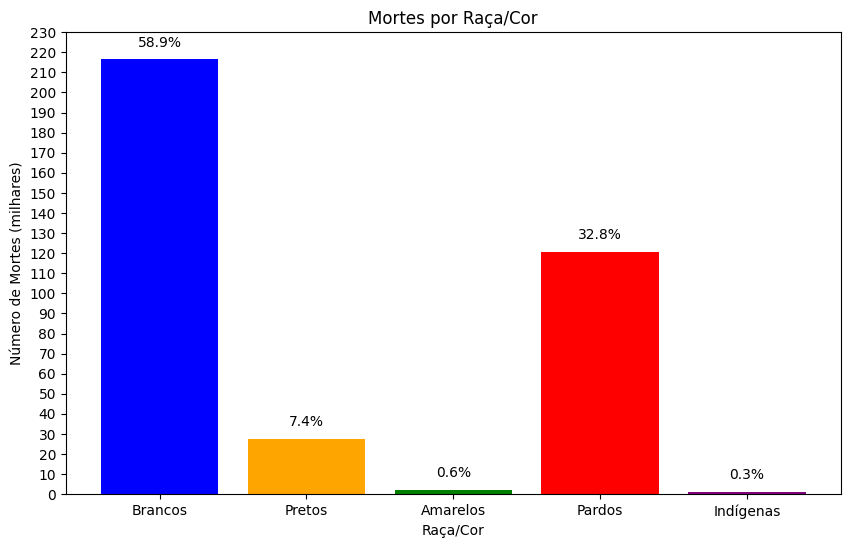

In [ ]:
# Contagem de mortes por raça/cor
contagem_por_racacor = {
    "Brancos": 216452,
    "Pretos": 27279,
    "Amarelos": 2024,
    "Pardos": 120503,
    "Indígenas": 1111
}

# Extrai os rótulos e contagens
labels = contagem_por_racacor.keys()
sizes = contagem_por_racacor.values()

# Define cores para as barras
cores = ['blue', 'orange', 'green', 'red', 'purple']

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=cores)

# Adiciona rótulos aos eixos e um título
plt.xlabel('Raça/Cor')
plt.ylabel('Número de Mortes (milhares)')
plt.title('Mortes por Raça/Cor')

# Ajusta a escala do eixo y para incluir os valores totais de mortes
plt.yticks(np.arange(0, max(sizes) + 20000, 10000), [f'{val/1000:.0f}' for val in np.arange(0, max(sizes) + 20000, 10000)])

# Adiciona a porcentagem total no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5000, f'{height / sum(sizes) * 100:.1f}%', ha='center', va='bottom')

# Exibe o gráfico
plt.show()


Conforme exposto no gráfico acima, cerca de 58.9 % das pessoas mortas foram brancas, 32,8 % pardas, 7,4 % pretas, 0.6 % amarelas e 0.3 % indígenas.

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO ESTADO CIVIL**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério Estado Civil

A coluna ESTCIV [8] demonstra a situação conjugal do falecido, informada pelos familiares  (1 – Solteiro; 2–Casado; 3 – Viúvo; 4 – Separado judicialmente/divorciado; 5 – União estável; 9 – Ignorado).


In [ ]:
contagem_por_estado_civil = df_morte_geral_copy['ESTCIV'].value_counts()

print(contagem_por_estado_civil)

ESTCIV
2    123692
3     95374
1     93555
4     31212
5     11926
9     11610
Name: count, dtype: int64


Diante dos resultados expostos, em 2023 a ordem de mortes com base na situação conjugal foram: casados (123.692), viúvos (95.374), solteiros (93.555), separados judicialmente ou divorciados (31.212), união estável (11926) e por fim, ignorada tal informação (11.610).

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO ESCOLARIDADE EM ANOS**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério escolaridade em anos.

A coluna ESC [9] trata sobre a escolaridade em anos. A referência é a seguinte: 1 –Nenhuma; 2 – de 1 a 3 anos; 3 – de 4 a 7 anos; 4 – de 8 a 11 anos; 5 – 12 anos e mais; 9 – Ignorado.


In [ ]:
# contagem em valores absolutos da escolaridade em anos
contagem_por_escolaridade = df_morte_geral_copy['ESC'].value_counts()

print(contagem_por_escolaridade)

ESC
3    105885
4     84586
2     62655
1     53983
9     34138
5     26122
Name: count, dtype: int64


In [ ]:

# contagem em valores percentuais da escolaridade em anos
contagem_por_escolaridade = df_morte_geral_copy['ESC'].value_counts()

# Calcula o total de ocorrências
total_ocorrencias = contagem_por_escolaridade.sum()

# Calcula a porcentagem de cada valor de escolaridade
porcentagem_por_escolaridade = (contagem_por_escolaridade / total_ocorrencias) * 100

print(porcentagem_por_escolaridade)

ESC
3    28.822519
4    23.024806
2    17.055059
1    14.694490
9     9.292564
5     7.110562
Name: count, dtype: float64


Diante dos resultados expostos acima, é possível determinar: 105.885 pessoas têm de 4 a 7 anos de estudo, 84.586 pessoas têm de 8 a 11 anos de estudo, 62.655 têm de 1 a 3 anos de estudo,  53.983 pessoas não têm nenhum estudo, de 34.138 pessoas não se conhece tal informação e apenas 26.122 pessoas têm entre 12 e mais anos de estudo. Esses dados são de relevante importância, pois permite a análise educacional de uma amostra da população brasileira, que apesar de não estarem mais vivos possuem representatividade. Observe, apenas 7.11 % das pessoas mortas tinham entre 12 ou mais anos de estudo. Pior, veja só: quase 15 % das pessoas falecidas não tinham nenhum ano de estudo, provavelmente pessoas analfabetas e colocadas a margem da sociedade brasileira.

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO ESCOLARIDADE EM NÍVEL**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério escolaridade em nível.

A coluna ESC2010 [10] aborda  o nível da última série concluída pelo falecido. (0 – Sem escolaridade; 1 – Fundamental I (1ª a 4ª série); 2 – Fundamental II (5ª a 8ª série); 3 – Médio (antigo 2º Grau); 4 – Superior incompleto; 5 – Superior completo; 9 – Ignorado)


In [ ]:
# Valores absolutos da escolaridade em nível
contagem_por_escolaridade_nivel = df_morte_geral_copy['ESC2010'].value_counts()

print(contagem_por_escolaridade_nivel)

ESC2010
1    132469
2     62254
3     58403
0     53983
9     34138
5     22014
4      4108
Name: count, dtype: int64


In [ ]:
# Valores Percentuais da escolaridade em nível

contagem_por_escolaridade_nivel = df_morte_geral_copy['ESC2010'].value_counts()

# Calcula o total de ocorrências
total_ocorrencias = contagem_por_escolaridade_nivel.sum()

# Calcula a porcentagem de cada valor de escolaridade
porcentagem_por_escolaridade_nivel = (contagem_por_escolaridade_nivel / total_ocorrencias) * 100

print(porcentagem_por_escolaridade_nivel)

ESC2010
1    36.058840
2    16.945905
3    15.897640
0    14.694490
9     9.292564
5     5.992340
4     1.118222
Name: count, dtype: float64


Confirmando o que foi exposto anteriormente, apenas quase 6 % (22.014) das pessoas mortas tinham ensino superior completo, 1.1 % (4.108) tinham ensino superior incompleto, 15.89 % (58.403) tinham ensino médio concluído, 53 % tinham ensino fundamental (194.723) e quase 15 % (53.983) não tinham nenhuma escolaridade. Assim, se ocorrer a soma das pessoas sem escolaridade com as pessoas que estudaram ensino fundamental I ou II, quase 70 % das pessoas mortas em 2023 tinham um educação rudimentar. Pode-se até inferir que tais pessoas ou não sabiam ler e escrever, ou estudaram o básico para realizar tais operações e cálculos simples.

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO OCUPAÇÃO**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério ocupação

A coluna OCUP [11] significa o tipo de trabalho que o falecido desenvolveu na maior parte de sua vida produtiva. Ela foi preenchimento de acordo com Classificação Brasileira de Ocupações – CBO 2002.


In [ ]:
ocupacao_mais_frequente = df_morte_geral_copy['OCUP'].value_counts()
print(ocupacao_mais_frequente)

OCUP
999993    105772
999992     59486
622020     17421
621005     12536
354705     10150
           ...  
318310         1
711220         1
623410         1
142605         1
848105         1
Name: count, Length: 1775, dtype: int64


**LIMITES DA PESQUISA:** Como a referência está representada em números, obtidos na Classificação Brasileira de Ocupações – CBO 2002, bem como o pouco tempo para obter tal classificação e tratá-la, não haverá uma análise abrangente desse campo. É possível, contudo, visualizar as 5 mais frequentes ocupações das pessoas que morreram em 2023, bem como sua ocorrência.

1º - 999993 - Outros trabalhadores em manutenção e reparação (105.722)

2º-  999992 - Trabalhadores elementares da manutenção (59.486)

3º - 622020-Trabalhador volante da agricultura (17421)

4º - 621005- trabalhador agropecuário em geral (12.536)

5º - Representante Comercial Autônomo (10150)

Referência: https://www.ocupacoes.com.br/



**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO LOCAL DO ÓBITO**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério local do óbito.

A coluna LOCOCOR [12] trata sobre o Local de ocorrência do óbito. As referência são: 1 – hospital; 2 – outros estabelecimentos de saúde; 3 – domicílio; 4 – via pública; 5 – outros; 6 - aldeia indígena; 9 – ignorado.


In [ ]:
contagem_por_local_obito = df_morte_geral_copy['LOCOCOR'].value_counts()

print(contagem_por_local_obito)


LOCOCOR
1    259816
3     61597
2     23849
4     11640
5     10381
9        86
Name: count, dtype: int64


Diante do exposto, há um número significativo de mortes em hospitais (259816). Depois que aparecem os outros locais: domicílio (61597), outros estabelecimentos de saúde (23.849), via pública (11640) e outros (10381).

**ESTUDO DA MORTALIDADE COM BASE NO ATENDIMENTO MÉDICO CONTINUADO**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério atendimento médico continuado.

A coluna ASSISTMED [13] se refere ao atendimento médico continuado que o paciente recebeu, ou não, durante a enfermidade que ocasionou o óbito. A referência é 1 – sim; 2 – não; 9 – ignorado.



In [ ]:
contagem_por_atendimento_continuado = df_morte_geral_copy['ASSISTMED'].value_counts()

print(contagem_por_atendimento_continuado)


ASSISTMED
1    300921
2     42283
9     24165
Name: count, dtype: int64


É possível observar que ocorreu de forma majoritária um atendimento continuado dos pacientes durante a enfermidade que ocasionou o óbito (300.921) em comparação com a ausência de atendimento continuado (42.283) e ignorado (24.165).

**ESTUDO DA MORTALIDADE COM BASE NA REALIZAÇÃO DA NECRÓPSIA**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério realização da necrópsia.

A coluna NECROPSIA [14] Refere-se a execução ou não de necropsia para confirmação do diagnóstico (1 – sim; 2 – não; 9 – ignorado).

In [ ]:
contagem_por_necropsia = df_morte_geral_copy['NECROPSIA'].value_counts()

print(contagem_por_necropsia)

NECROPSIA
2    296448
1     55390
9     15531
Name: count, dtype: int64


Diante do exposto, observá-se que maior parte dos mortos (296448) não passaram por necropsia. Apenas uma pequena parcela foi necropsiada (55.390).

**ESTUDO DA MORTALIDADE COM BASE NA REALIZAÇÃO DO DIAGNÓSTICO DA CAUSA TERMINAL**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério diagnóstico da causa terminal.

A coluna 15 LINHAA [15] refere-se ao diagnóstico da causa terminal. Isto é, o diagnóstico da doença ou estado mórbido que causou diretamente a morte. A referência é o Código CID 10.


In [ ]:
causa_terminal = df_morte_geral_copy['LINHAA'].value_counts()
print(causa_terminal)

LINHAA
*A419              73800
*J960              34186
*R570              23959
*J969              18732
*R092              16025
                   ...  
*J969*A418             1
*F102*K808             1
*R960*R568             1
*E86X*E878*R739        1
*V17X                  1
Name: count, Length: 4094, dtype: int64


**LIMITES DA PESQUISA:** Da mesma forma como ocorreu em ocupações, a causa terminal está representada por um código, dessa vez alfanumérico (CÓDIGO CID 10). Dessa forma, devido ao pouco tempo para obter a classificação e tratá-la, não haverá uma análise abrangente desse campo. É possível, contudo, visualizar as 5 mais frequentes causas terminais das pessoas que morreram em 2023, bem como sua ocorrência.

1ª A419 - Septicemia não especificada (73.800)

2º J960 - Insuficiência respiratória aguda (34.186)

3º R570 - Choque Cardiogênico (23.959)

4º J969 - insuficiência respiratória não especificada (18.732)

5º R092 - Parada Respiratória (16.025)

Referência: https://cid.ninsaude.com/pesquisar-por-cid/

***ANÁLISE CONCEITUAL DAS COLUNAS 16 A 26 ***

A coluna [16] LINHAB CIDs informam na Linha B DO referente diagnóstico a causa antecedente ou conseqüencial do estado mórbido, se existir, que
produziu a causa direta da morte registrada na linha A. (Códigos CID 10)

A coluna CAUSABAS [17]- Causa básica da DO. (Códigos CID 10)

A coluna DTATESTADO [18] - Data do Atestado



A coluna DTCADASTRO [19] - Data do cadastro do óbito (Data no padrão ddmmaaaa)

A coluna ATESTANTE [20]  - Indica se o medico que assina atendeu o paciente.

A coluna DTRECEBIM [21] - Data do recebimento (Data no padrão ddmmaaaa)

A coluna ATESTADO [22] - CIDs informados no atestado (Códigos CID 10)

A coluna ESCFALAGR1  [23] - Escolaridade do falecido agregada (formulário a partir de 2010)  (00 – Sem Escolaridade; 01 – Fundamental I Incompleto; 02 – Fundamental I Completo; 03 – Fundamental II Incompleto; 04 – Fundamental II Completo; 05 – Ensino Médio Incompleto; 06 – Ensino Médio Completo; 07 –
Superior Incompleto; 08 – Superior Completo; 09 – Ignorado; 10 – Fundamental I Incompleto ou Inespecífico; 11 – Fundamental II Incompleto ou Inespecífico; 12 – Ensino Médio Incompleto ou Inespecífico)

A coluna STDOEPIDEM  [24] - Status de DO Epidemiológica (1 - Sim; 0 - Não)

A coluna STDONOVA  [25] - Status de DO Nova. (1 - Sim; 0 - Não)

A coluna DIFDATA    [26] - Diferença entre a data de óbito e data do recebimento original da DO ([DTOBITO] – [DTRECORIG]) (Números)

Os dados que constam nas colunas 16 a 31 terão apenas análise conceitual, pois não foram considerados de grande relevância para estudos mais detalhados. Ademais, o período temporal curto da pesquisa condiciona na realização de escolhas temáticas e analíticas.

**ESTUDO DA MORTALIDADE COM BASE EM ÓBITOS INVESTIGADOS**

Nessa etapa haverá o estudo sobre mortalidade, com base no critério da realização dos óbitos investigados.

 A coluna TPPOS  [27] trata sobre os Óbitos investigados. A referência é 1 – sim; 2 – não.

In [ ]:
obitos_investigados = df_morte_geral_copy['TPPOS'].value_counts()
print(obitos_investigados)

TPPOS
N    295357
S     72012
Name: count, dtype: int64


Diante do exposto, percebe-se que em 2023 a maioria dos óbitos não foram investigados (295.357). Apenas em 72.012 falecimentos ocorreu a investigação da causa mortis.

**ANÁLISE CONCEITUAL DAS COLUNAS 28 A 33**

A coluna MUNICIPIO_DO_FALECIDO [28] representa o município de naturalidade do falecido. Ela era originalmente chamada CODMUNNATU e sua referência estava em números. Entretanto, para haver maior compreensão sobre os dados, ocorreu a sua correlação com os códigos da tabela do IBGE. Dessa forma, atualmente a referência não está em números, mas em nomes.

A coluna MUNICIPIO_DO_OBITO [29] representa o município onde ocorreu o óbito. Ela era originalmente chamada CODMUNOCOR e sua referência estava em números. Entretanto, para haver maior entendimento sobre os dados, ocorreu a sua correlação com os códigos da tabela do IBGE. Dessa forma, atualmente a referência não está em números, mas em nomes.

A coluna MUNICIPIO_DE_RESIDENCIA [30] representa o município de residência do falecido. Em caso de óbito fetal, é considerado o município de residência da mãe (informação interessante apenas para análise do data frame df_maes). Ela era originalmente chamada CODMUNRES e sua referência estava em números. Entretanto, para haver maior entendimento sobre os dados, ocorreu a sua correlação com os códigos da tabela do IBGE. Dessa forma, atualmente a referência não está em números, mas em nomes.

A coluna UF_MUNICIPIO_DO_FALECIDO [31] representa o estado federativo de naturalidade do falecido.

A coluna UF_MUNICIPIO_DO_OBITO [32] representa o estado onde ocorreu o óbito.

A coluna UF_MUNICIPIO_DE_RESIDENCIA [33] representa o estado de residência do falecido. Em caso de óbito fetal foi considerado o estado de residência da mãe.



**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO MUNICÍPIO**

In [ ]:
# Análise sobre o município com o maior número de mortes

municipio_maior_morte = df_morte_geral_copy['MUNICIPIO_DO_OBITO'].value_counts()
print("Os municípios com a maior quantidade de mortes em 2023 são :", municipio_maior_morte )

Os municípios com a maior quantidade de mortes em 2023 são : MUNICIPIO_DO_OBITO
RECIFE                   13407
BELO HORIZONTE            9333
CURITIBA                  9211
CAMPINAS                  7270
RIO DE JANEIRO            7192
                         ...  
TIMBAÚBA DOS BATISTAS        1
SÃO JOÃO DA URTIGA           1
PUXINANÃ                     1
AFRÂNIO                      1
TURUÇU                       1
Name: count, Length: 4046, dtype: int64


 Diante do resultado obtido, é possivel concluir que os cinco municípios com maior número de mortes em 2023 foram Recife (13.407), Belo Horizonte (9333), Curitiba (9211), Campinas (7270) e Rio de Janeiro (7197).
 Então, diante desse resultado é importante deixar um alerta sobre a necessidade de maiores investimentos em saúde e em outros setores para aumentar a expectativa de vida da população, bem como sua qualidade de vida.

In [ ]:
# Análise sobre a quantidade de mortes que ocorreram em cidades diferentes da cidade de nascimento
# Vamos contar quantos municípios de morte são diferentes dos municípios de nascimento
diferentes = df_morte_geral_copy[df_morte_geral_copy['MUNICIPIO_DO_FALECIDO'] != df_morte_geral_copy['MUNICIPIO_DO_OBITO']]

# contando o número de municípios diferentes
num_municipios_diferentes = len(diferentes)

print("Número de municípios de morte diferentes dos municípios de nascimento:", num_municipios_diferentes)

total_registros = len(df_morte_geral_copy)
print("O número de mortes em 2023 foi: ", total_registros)

percentual_diferentes = (len(diferentes) /(total_registros) * 100)
print(percentual_diferentes)

Número de municípios de morte diferentes dos municípios de nascimento: 263296
O número de mortes em 2023 foi:  367369
71.67071799743582


 Diante do resultado obtido, é possível constatar que 71.6 % das mortes ocorreram em cidades diferentes das cidades naturais dos indivíduos. E o número absoluto foi 263.296 mortes.

In [ ]:
# Análise sobre a quantidade de mortes que ocorreram em cidades diferentes da cidade de residência
# Vamos contar quantos municípios de morte são diferentes dos municípios de nascimento
diferentes = df_morte_geral_copy[df_morte_geral_copy['MUNICIPIO_DE_RESIDENCIA'] != df_morte_geral_copy['MUNICIPIO_DO_OBITO']]

# contando o número de municípios diferentes
num_municipios_diferentes = len(diferentes)

print("Número de municípios de morte diferentes dos municípios de residência:", num_municipios_diferentes)

total_registros = len(df_morte_geral_copy)

percentual_diferentes = (len(diferentes) /(total_registros) * 100)
print(percentual_diferentes)

Número de municípios de morte diferentes dos municípios de residência: 101679
27.67762113841941


Muitas vezes as mortes ocorrem em locais distintos das cidades de residência dos indivíduos. Foi possível verificar que em 2023 tal fato ocorreu 101.679 vezes, representando 27.67 % do valor total.

**ESTUDO DA MORTALIDADE COM BASE NO CRITÉRIO ESTADO**

Análise sobre o estado com o maior número de mortes.

In [ ]:
uf_maior_morte = df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO'].value_counts()
print("Os estados com a maior quantidade de mortes em 2023 são :", uf_maior_morte )

Os estados com a maior quantidade de mortes em 2023 são : UF_MUNICIPIO_DO_OBITO
SÃO PAULO              110849
PARANÁ                  41831
MINAS GERAIS            27427
RIO GRANDE DO SUL       23465
SANTA CATARINA          22283
PERNAMBUCO              22091
RIO DE JANEIRO          17030
CEARÁ                   17004
GOIÁS                    9642
MATO GROSSO DO SUL       8980
ESPÍRITO SANTO           7695
PARÁ                     7571
BAHIA                    7471
MARANHÃO                 7384
MATO GROSSO              5506
AMAZONAS                 5072
PIAUÍ                    4311
53                       4085
RIO GRANDE DO NORTE      3732
PARAÍBA                  3342
RONDÔNIA                 3116
ALAGOAS                  1798
TOCANTINS                1765
ACRE                     1289
RORAIMA                  1235
SERGIPE                  1154
AMAPÁ                     241
Name: count, dtype: int64


O top 5 estados com maior número de mortes foram todos da região sul-sudeste, sendo dois do sudeste (São Paulo e Minas Gerais) e três do sul (Paraná, Rio Grande do Sul e Santa Catarina). Posteriormente que aparecem estados de outras regiões: Pernambuco ( nordeste), Rio de Janeiro (sudeste novamente), Ceará (nordeste) e outros.

Precisamos analisar os tipos de mortes mais comuns nestes estados para que possamos compreender se houve algum tipo de evento natural, epidemiológico ou aumento da violência que tenha impactado no elevado número de mortes nestes estados e regiões em relação aos outros. Também pode ser critério demográfico, isto é, o tamanho da população dos estados do sudeste como São Paulo são maiores em valores absolutos.

Análise sobre a quantidade de mortes que ocorreram em estados diferentes do estado de nascimento. Vamos contar quantos dos estados onde ocorreu o óbito são diferentes dos estados de nascimento.

In [ ]:

diferentes = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DO_FALECIDO'] != df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO']]

# contando o número de estados diferentes
num_uf_diferentes = len(diferentes)

print("Número de estados de morte diferentes dos estados de nascimento:", num_uf_diferentes)

total_registros = len(df_morte_geral_copy)
print("O número de mortes em 2023 foi: ", total_registros)

percentual_diferentes = (len(diferentes) /(total_registros) * 100)
print("O percentual de estados distintos (nascimento e morte):", percentual_diferentes)

Número de estados de morte diferentes dos estados de nascimento: 92608
O número de mortes em 2023 foi:  367369
O percentual de estados distintos (nascimento e morte): 25.20844164858766


Diante do resultado obtido, é possível constatar que 25.20 % das mortes ocorreram em estados diferentes dos estados naturais dos falecidos. E o número absoluto foi 92.608 mortes.

Análise sobre a quantidade de mortes que ocorreram em estados diferentes do estado de residência.

In [ ]:
diferentes = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DE_RESIDENCIA'] != df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO']]

# contando o número de estados diferentes
num_uf_diferentes = len(diferentes)

print("Número de estados onde ocorreu o óbito que são diferentes dos estados de residência:", num_uf_diferentes)

total_registros = len(df_morte_geral_copy)

percentual_diferentes = (len(diferentes) /(total_registros) * 100)
print(percentual_diferentes)

Número de estados onde ocorreu o óbito que são diferentes dos estados de residência: 4549
1.238264524224962


Diante do resultado obtido, é possível constatar que 1.23 % das mortes ocorreram em estados diferentes dos estados de residência dos falecidos. E o número absoluto foi 4.549 mortes.

**Análise das mortes mais comuns nos estados com o maior número de mortes**

Iremos usar as duas colunas abaixo para analisar as causas de morte mais comuns dos estados Top 5.

In [ ]:
df_morte_geral_copy[['LINHAA', 'CAUSABAS']]

,LINHAA,CAUSABAS
2,*I509,I420
12,*J960,J189
16,*A419,K805
27,*A419,J159
32,*R578,A419
...,...,...
1400483,*R688,C509
1400484,*J81X,E112
1400499,*I469,I219
1400501,*J960,C349


Criando df para cada estado:

In [ ]:
df_saopaulo = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO'] == 'SÃO PAULO']
df_parana = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO'] == 'PARANÁ']
df_minasgerais = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO'] == 'MINAS GERAIS']
df_riograndesul = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO'] == 'RIO GRANDE DO SUL']
df_santacatarina = df_morte_geral_copy[df_morte_geral_copy['UF_MUNICIPIO_DO_OBITO'] == 'SANTA CATARINA']

Separando as mortes mais comuns de cada estado Top 5

In [ ]:
top_causabas_sp = df_saopaulo['LINHAA'].value_counts()
top_linhaa_sp = df_saopaulo['CAUSABAS'].value_counts()

In [ ]:
top_causabas_pr = df_parana['LINHAA'].value_counts()
top_linhaa_pr = df_parana['CAUSABAS'].value_counts()

In [ ]:
top_causabas_mg = df_minasgerais['LINHAA'].value_counts()
top_linhaa_mg = df_minasgerais['CAUSABAS'].value_counts()

In [ ]:
top_causabas_rs = df_riograndesul['LINHAA'].value_counts()
top_linhaa_rs = df_riograndesul['CAUSABAS'].value_counts()

In [ ]:
top_causabas_sc = df_santacatarina['LINHAA'].value_counts()
top_linhaa_sc = df_santacatarina['CAUSABAS'].value_counts()

**As causas de mortes mais comuns do Top 5 estados com mais mortes**

São Paulo

In [ ]:
print(top_causabas_sp)
top_linhaa_sp

LINHAA
*A419         22922
*J960         10665
*R570          7345
*J969          5965
*I219          4991
              ...  
*Y848*J958        1
*J69X             1
*A419*J159        1
*T421             1
*C795*C787        1
Name: count, Length: 1804, dtype: int64


CAUSABAS
I219    8425
J189    4779
N390    3350
G309    2472
C349    2356
        ... 
D037       1
O000       1
Y071       1
R101       1
Q851       1
Name: count, Length: 2603, dtype: int64

**LINHAA**

* A419 - Septicemia não especificada
* J960 - Insuficiência respiratória aguda
* R570 - Choque cardiogênico
* J969 - Insuficiência respiratória não especificada
* I219 - Infarto agudo do miocárdio não especificado

**CAUSABAS**

* I219 - Infarto agudo do miocárdio não especificado
* J189 - Pneumonia não especificada
* N390 - Infecção do trato urinário de localização não especificada
* G309 - Doença de Alzheimer não especificada
* C349 - Neoplasia maligna dos brônquios ou pulmões, não especificado

Paraná

In [ ]:
print(top_causabas_pr)
top_linhaa_pr

LINHAA
*A419         9043
*J960         3421
*R570         2399
*J969         1836
*R092         1620
              ... 
*E145            1
*I211            1
*E790            1
*T811*R571       1
*C957            1
Name: count, Length: 1119, dtype: int64


CAUSABAS
I219    1857
J189    1794
I64      945
G309     903
C349     901
        ... 
J410       1
M860       1
C715       1
I742       1
K225       1
Name: count, Length: 1938, dtype: int64

**LINHAA**

* A419 - Septicemia não especificada

* J960 - Insuficiência respiratória aguda

* R570 - Choque, não especificado

* J969 - Insuficiência respiratória não especificada

* R092 - Dispneia

**CAUSABAS**

* I219 - Infarto agudo do miocárdio, não especificado

* J189 - Pneumonia não especificada

* I64 - Acidente vascular cerebral, não especificado como hemorrágico ou isquêmico

* G309 - Demência não especificada, não especificada como de início agudo ou crônico

* C349 - Tumor maligno do brônquio ou do pulmão, não especificado como primário ou secundário

Minas Gerais

In [ ]:
print(top_causabas_mg)
top_linhaa_mg

LINHAA
*A419              6338
*J960              2132
*R570              1476
*J969              1430
*R092              1077
                   ... 
*Y836*T811            1
*R094                 1
*Y753*T814*B968       1
*R739                 1
*R640                 1
Name: count, Length: 1032, dtype: int64


CAUSABAS
J189    1297
I219    1161
N390     717
I64      677
G309     661
        ... 
A188       1
K458       1
W338       1
D383       1
Y129       1
Name: count, Length: 1701, dtype: int64

**LINHAA**

* A419 - Septicemia não especificada
* J960 - Insuficiência respiratória aguda
* R570 - Choque, não especificado
* J969 - Insuficiência respiratória não especificada
* R092 - Dispneia

**CAUSABAS**

* J189 - Pneumonia não especificada
* I219 - Infarto agudo do miocárdio, não especificado
* N390 - Infecção do trato urinário, não especificada
* I64 - Acidente vascular cerebral, não especificado como hemorrágico ou isquêmico
* G309 - Demência não especificada, não especificada como de início agudo ou crônico

Rio Grande do Sul

In [ ]:
print(top_causabas_rs)
top_linhaa_rs

LINHAA
*A419    6065
*J960    2229
*J969    2217
*R092    1994
*R570     797
         ... 
*C56X       1
*K223       1
*E108       1
*S273       1
*K639       1
Name: count, Length: 715, dtype: int64


CAUSABAS
I219    977
C349    904
G309    680
J189    616
J449    552
       ... 
V239      1
C062      1
K658      1
C621      1
E839      1
Name: count, Length: 1399, dtype: int64

**LINHAA**

* A419 - Septicemia não especificada
* J960 - Insuficiência respiratória aguda
* J969 - Insuficiência respiratória não especificada
* R092 - Dispneia
* R570 - Choque, não especificado

**CAUSABAS**

* I219 - Infarto agudo do miocárdio, não especificado
* C349 - Tumor maligno do brônquio ou do pulmão, não especificado como primário ou secundário
* G309 - Demência não especificada, não especificada como de início agudo ou crônico
* J189 - Pneumonia não especificada
* J449 - Asma não especificada, com exacerbação aguda

Santa Catarina

In [ ]:
print(top_causabas_sc)
top_linhaa_sc

LINHAA
*A419              4524
*J960              2042
*R092              1822
*R570              1079
*J969              1057
                   ... 
*F013                 1
*G629                 1
*Y831*T847            1
*X610*T430            1
*X690*X610*X780       1
Name: count, Length: 935, dtype: int64


CAUSABAS
I219    1160
J189     754
C349     693
G309     564
J440     556
        ... 
X040       1
V200       1
C715       1
C927       1
D591       1
Name: count, Length: 1611, dtype: int64

**LINHAA**

* A419 - Septicemia não especificada
* J960 - Insuficiência respiratória aguda
* R092 - Dispneia
* R570 - Choque, não especificado
* J969 - Insuficiência respiratória não especificada

**CAUSABAS**

* I219 - Infarto agudo do miocárdio, não especificado
* J189 - Pneumonia não especificada
* C349 - Tumor maligno do brônquio ou do pulmão, não especificado como primário ou secundário
* G309 - Demência não especificada, não especificada como de início agudo ou crônico
* J440 - Doença pulmonar obstrutiva crônica com componente agudo, não especificada   

**CONCLUSÃO**

As diversas análises elaboradas sobre as mortes não fetais no Brasil em 2023 são de significante importância para compreender as mortes no Brasil e estabelecer relações com a conjuntura social do Brasil: expectativa de vida, sistema educacional, sexo, ocupações e outros.

 Apesar de alguns limites de pesquisa, é perceptível o quanto é desalentador a situação brasileira do ponto de vista social. A maioria dos mortos, por exemplo, tinham ocupações precárias e baixo nível escolar.

 Ter um dimensionamento de quem são seus mortos é de fundamental importância, pois foram uma amostra da população brasileira. De modo, que a partir de tais indicadores, medidas devem ser tomadas pelas instituições públicas e pela sociedade em geral para melhorar a qualidade de vida da população e o sistema público de saúde.

**7.2 Análise das Mortes Fetais (Dataframe df_maes)**

In [ ]:
#Cópia do dataframe por segurança
df_fetal= df_maes.copy(deep=True)

Anteriormente, ocorreu a análise dos óbitos não fetais. Nesse momento, apenas serão visualizados e analisados os óbitos fetais. Como pode ser visualizado abaixo: 100 % dos dados são de óbitos fetais (tipo 1). E o número absoluto de mortes fetais em 2023 foi 22.153.

É importante esclarecer o termo feto. Essa denominação é dada para o embrião, após a oitava semana posterior a fecundação. Isto é, até a oitava semana é chamada embrião e posteriormente feto.

Para o direito civil, o feto não possui personalidade civil (direito a herança, ao nome, por exemplo), entretanto seus direitos são resguardados desde a concepção. Logo, o feto tem tais direitos resguardados, inclusive o direito a vida. Qualquer atentado é considerado crime, com exceção de casos específicos.

In [ ]:
# Obtenção dos dados fetais: valor, número absoluto (contagem) e percentual
contagem_valores = df_fetal['TIPOBITO'].value_counts()
percentual_valores = contagem_valores / len(df_fetal) * 100
resultados = pd.DataFrame({'Valores': contagem_valores.index, 'Contagem': contagem_valores.values, 'Percentual (%)': percentual_valores.values})
resultados

,Valores,Contagem,Percentual (%)
0,1,22153,100.0


**ANÁLISE GERAL DO DATAFRAME df_fetal**

O dataframe df_fetal possui 15 colunas, conforme exposto abaixo. Não ocorrerá análise conceitual pois todas as colunas estavam presentes no outro data frame. E essa análise já ocorreu anteriormente.

In [ ]:
df_fetal.info()
df_fetal

<class 'pandas.core.frame.DataFrame'>
Index: 22153 entries, 14 to 1400567
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TIPOBITO               22153 non-null  object
 1   DTOBITO                22153 non-null  object
 2   NATURAL                22153 non-null  object
 3   SEXO                   22153 non-null  object
 4   LOCOCOR                22153 non-null  object
 5   ASSISTMED              22153 non-null  object
 6   NECROPSIA              22153 non-null  object
 7   LINHAA                 22153 non-null  object
 8   CAUSABAS               22153 non-null  object
 9   ATESTADO               22153 non-null  object
 10  STDOEPIDEM             22153 non-null  object
 11  STDONOVA               22153 non-null  object
 12  DIFDATA                22153 non-null  object
 13  TPPOS                  22153 non-null  int64 
 14  MUNICIPIO_DO_OBITO     22153 non-null  object
 15  UF_MUNICIPIO_DO_OBITO

,TIPOBITO,DTOBITO,NATURAL,SEXO,LOCOCOR,ASSISTMED,NECROPSIA,LINHAA,CAUSABAS,ATESTADO,STDOEPIDEM,STDONOVA,DIFDATA,TPPOS,MUNICIPIO_DO_OBITO,UF_MUNICIPIO_DO_OBITO
14,1,14022023,841,1,1,1,2,*P95X,P000,P95/P021/P000,0,1,010,2,SANTO ANTÔNIO DA PLATINA,PARANÁ
91,1,01012023,822,2,1,1,2,*Q899,Q899,Q899,0,1,002,2,PICOS,PIAUÍ
92,1,01012023,822,2,1,1,2,*P209,P024,P209/P024*P000,0,1,107,1,PICOS,PIAUÍ
146,1,01012023,813,2,3,2,2,P021,P021,/P209/P021,0,1,302,1,NOVA OLINDA DO NORTE,AMAZONAS
209,1,01012023,833,1,1,1,2,*P964,Q789,P964/Q789,0,1,087,1,RIO DE JANEIRO,RIO DE JANEIRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400546,1,08052023,813,1,6,1,2,*P209,P039,P209/P039*P031,0,1,036,9,ATALAIA DO NORTE,AMAZONAS
1400554,1,12062023,813,1,6,2,2,*P95X,P95,P95,0,1,108,9,EIRUNEPÉ,AMAZONAS
1400555,1,14062023,815,2,3,2,2,*P95X,P95,P95,0,1,065,9,JACAREACANGA,PARÁ
1400565,1,27072023,816,1,6,2,2,*P209,P209,P209,0,1,095,9,OIAPOQUE,AMAPÁ


**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO TEMPORAL**

In [ ]:
# 1. Converter a coluna de datas para o tipo datetime, especificando o formato "dia mês ano"
df_fetal['DTOBITO'] = pd.to_datetime(df_fetal['DTOBITO'], format='%d%m%Y')

# 2. Contar o número de mortes em cada data
contagem_por_data = df_fetal['DTOBITO'].value_counts()
print(contagem_por_data)

# 3. Encontrar a data com o maior número de mortes
data_mais_frequente = contagem_por_data.idxmax()

print("A data com o maior número de mortes fetais é:", data_mais_frequente)


DTOBITO
2023-04-26    99
2023-07-26    96
2023-04-14    93
2023-04-27    92
2023-08-16    90
              ..
2023-12-29     9
2023-12-27     8
2023-12-28     8
2023-12-30     4
2023-12-31     4
Name: count, Length: 365, dtype: int64
A data com o maior número de mortes fetais é: 2023-04-26 00:00:00


Conforme apresentado, a data com o maior número de mortes fetais foi 26 de abril de 2023.

In [ ]:
# O número de mortes por mês e o mês com maior número de mortos


# 1. Converta a coluna de datas para o tipo datetime, especificando o formato "diamesano"
df_fetal.loc[:, 'DTOBITO'] = pd.to_datetime(df_fetal['DTOBITO'], format='%d%m%Y')

# 2. Extraia o mês de cada data
df_fetal.loc[:, 'MÊS'] = df_fetal['DTOBITO'].dt.month

# 3. Agrupe por mês, e some o número de mortes
total_mortes_por_mes = df_fetal.groupby('MÊS').size()

# 4. Encontre o mês com o maior número total de mortes
mes_max_mortes = total_mortes_por_mes.idxmax()

# 5. Imprima o número de mortes por mês
print("Número de mortes por mes:")
print(total_mortes_por_mes)

#6. Imprima o mês com maior número total de mortes
print("\nO mês com mais mortes fetais é o mês número:", mes_max_mortes)


Número de mortes por mes:
MÊS
1     2142
2     1910
3     2107
4     2061
5     2013
6     1938
7     1966
8     1863
9     1785
10    1745
11    1698
12     925
dtype: int64

O mês com mais mortes fetais é o mês número: 1


O mês com mais mortes fetais foi janeiro (2142). Também não há grande variação entre os meses, com exceção do mês de dezembro. Há provavelmente outlier nesse período, como dito na análise anterior.

**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO SEXO**

In [ ]:
# Contagem de mortos fetais (sexo Masculino e Feminino)

contagem_por_sexo = df_fetal['SEXO'].value_counts()

print(contagem_por_sexo)

SEXO
1    11526
2     9993
0      634
Name: count, dtype: int64


**Limitação da análise :** O dicionário não esclareceu como o critério sexo masculino, feminino e ignorado está relacionado com os números 1, 2 e 3. Contudo, se seguirmos as tendência dos outros conceitos, que seguiu a numeração pela ordem exposta do critério quantitativo: masculino é 1, feminino é 2, e ignorado é 0. Devido ao pouco tempo de pesquisa, não foi possível contactar os pesquisadores para dirimir tal problema, o que em um estudo mais longo seria de essencial importancia. Caso a análise siga a tendência dos outros conceitos, no ano de 2023 ocorreu mais mortes fetais do sexo masculino [11.526], depois de mulheres [9.993] e por fim do termo ignorado [634]. Há um aumento significativo do termo ignorado em relação às mortes gerais/não fetais [13], provavelmente porque o sexo do feto ainda não podia ser determinado.

**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO LOCAL DE OCORRÊNCIA DO ÓBITO**

In [ ]:
contagem_por_local_obito = df_fetal['LOCOCOR'].value_counts()

print(contagem_por_local_obito)

LOCOCOR
1    20654
3      786
2      280
5      214
9      109
4       98
6       12
Name: count, dtype: int64


Diante do exposto, há um número significativo de mortes fetais em hospitais (20654). Depois que aparecem os outros locais: domicílio (786), outros estabelecimentos de saúde (280),  outros (214), ignorado (109), via pública (98) e aldeia indígena (12). Quando comparado com o antigo dataframe, é perceptível que houve um aumento percentual de mortes em hospitais e em casa, assim como diminuição de mortes em via pública. Isso ocorre provavelmente devido a peculiaridade do sujeito, ser que ainda não se locomove.

**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO REALIZAÇÃO DE NECROPSIA**

In [ ]:
contagem_por_necropsia = df_fetal['NECROPSIA'].value_counts()

print(contagem_por_necropsia)

NECROPSIA
2    11188
9     7000
1     3162
9      803
Name: count, dtype: int64


Diante do exposto, verifica-se que 11.188 fetos não passaram por necropsia. Apenas 3.162 foram necropsiados.

**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO CAUSA TERMINAL**

In [ ]:
causa_terminal = df_fetal['LINHAA'].value_counts()
print(causa_terminal)

LINHAA
*P95X         6651
*P209         5953
*P200         3661
*P021          544
*P072          449
              ... 
*Q789            1
*P741            1
*P010*P022       1
*P200*P025       1
*P960            1
Name: count, Length: 338, dtype: int64


**LIMITES DA PESQUISA:** A causa terminal está representada por um código alfanumérico (CÓDIGO CID 10). Dessa forma, devido ao pouco tempo para obter a classificação e tratá-la, não haverá uma análise abrangente desse campo. É possível, contudo, visualizar as 5 mais frequentes causas terminais dos fetos que morreram em 2023, bem como sua ocorrência.

1ª P95X - Morte fetal de causa não especificada (6.651)

2º P209 - Hipóxia intra-uterina não especificada (5.953)

3º P200 - Hipóxia intra-uterina diagnosticada antes do início do trabalho de parto (3.661)

4º P021 - Feto e recém-nascido afetados por outras formas de descolamento da placenta e hemorragia (544)

5º P072 - Imaturidade extrema (449)

Referência: https://cid.ninsaude.com/pesquisar-por-cid/

**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO MUNICÍPIO DO ÓBITO**

In [ ]:
# Análise sobre o município com o maior número de mortes

municipio_maior_morte = df_fetal['MUNICIPIO_DO_OBITO'].value_counts()
print("Os municípios com a maior quantidade de mortes fetais em 2023 são :", municipio_maior_morte )

Os municípios com a maior quantidade de mortes fetais em 2023 são : MUNICIPIO_DO_OBITO
SÃO PAULO           1328
SALVADOR             536
BRASÍLIA             468
FORTALEZA            442
MANAUS               409
                    ... 
AFRÂNIO                1
FÊNIX                  1
MACARANI               1
GENERAL CARNEIRO       1
ITAÍ                   1
Name: count, Length: 1655, dtype: int64


Diante do resultado obtido, é possivel concluir que os cinco municípios com maior número de mortes fetais em 2023 foram São Paulo (1.328), Salvador (536), Brasília (468), Fortaleza (442) e Manaus (409).

Então, diante desse resultado é importante deixar alguns questionamentos: por que o número de mortes fetais em São Paulo é quase três vezes maior que a segunda cidade? É *outlier*? Existe uma coleta eficiente de dados em relação as outras cidades? A saúde pública focada no atendimento para o pré-natal, parto e puerpério não é eficiente ?

Enfim, tais questionamentos são importantes a fim que investigações sejam realizadas e medidas implementadas.


**ESTUDO DA MORTALIDADE FETAL COM BASE NO CRITÉRIO ESTADO DO ÓBITO**

In [ ]:
uf_maior_morte = df_fetal['UF_MUNICIPIO_DO_OBITO'].value_counts()
print("Os estados com a maior quantidade de mortes fetais em 2023 são :", uf_maior_morte )

Os estados com a maior quantidade de mortes fetais em 2023 são : UF_MUNICIPIO_DO_OBITO
SÃO PAULO              4478
BAHIA                  2053
MINAS GERAIS           1994
RIO DE JANEIRO         1367
PARÁ                   1343
PARANÁ                 1044
CEARÁ                  1015
MARANHÃO                961
PERNAMBUCO              814
RIO GRANDE DO SUL       798
AMAZONAS                779
GOIÁS                   750
SANTA CATARINA          684
MATO GROSSO             541
53                      468
ESPÍRITO SANTO          416
MATO GROSSO DO SUL      405
PARAÍBA                 372
SERGIPE                 327
PIAUÍ                   311
ALAGOAS                 266
TOCANTINS               216
RIO GRANDE DO NORTE     187
RONDÔNIA                186
AMAPÁ                   134
ACRE                    130
RORAIMA                 114
Name: count, dtype: int64


Os estados com mais mortes fetais em 2023 foram: São Paulo (4478), Bahia (2053), Minas Gerais (1994), Rio de Janeiro (1367) e Pará (1343).
Observação: o código 53 não foi devidamente modificado mas representa o Distrito Federal.

**CONCLUSÃO**

Analisar os dados sobre mortalidade fetal é importante para compreender a situação da saúde pública brasileira.

O Aborto, por outro lado, é questão a ser tratada, não escondida. Até que ponto tais mortes fetais foram naturais, provocadas ou frutos de erros médicos ?

Enfim, a coleta e a análise dos dados são passos relevantes a fim de buscar entender os problemas crônicos sociais e implementar alternativas no âmbito legal e de políticas públicas.